In [19]:
import pickle
from pandas.tools.plotting import *
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["font.size"] = 20
import os
import requests
import pandas as pd
#from cStringIO import StringIO
import numpy as np
import matplotlib.pyplot as pl
import scipy as spy
from scipy.stats import gamma
from scipy.optimize import minimize
import emcee
import pystan
from pystan import StanModel
import stan_utility_copy
import corner
import gc
import seaborn as sns
import h5py
import credible_interval


In [2]:
periodInsolationSwitch = 'P' #raw_input("Period or Insolation: P or I? -- ")

In [3]:
with open("/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Stan_Kepler_Populations/outputs/DR25_9.3_occ_rate_3000_real_Runcs.pkl", "rb") as f:
    data_dict = pickle.load(f)
    # or with a list
    # data_list = pickle.load(f)
type(data_dict)
retrieved_results_real_uncs = data_dict['fit']


/Users/meganshabram/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [4]:
with open("/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Stan_Kepler_Populations/outputs/DR25_9.3_occ_rate_3000_no_Runcs.pkl", "rb") as f:
    data_dict = pickle.load(f)
    # or with a list
    # data_list = pickle.load(f)
type(data_dict)
retrieved_results_no_uncs = data_dict['fit']


/Users/meganshabram/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [5]:
with open("/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Stan_Kepler_Populations/outputs/Q1_16_9.1_occ_rate_3000_real_Runcs.pkl", "rb") as f:
    data_dict = pickle.load(f)
    # or with a list
    # data_list = pickle.load(f)
type(data_dict)
retrieved_results_Q1_16_real_uncs = data_dict['fit']

/Users/meganshabram/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [6]:
with open("/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Stan_Kepler_Populations/outputs/Q1_16_9.1_occ_rate_3000_no_Runcs.pkl", "rb") as f:
    data_dict = pickle.load(f)
    # or with a list
    # data_list = pickle.load(f)
type(data_dict)
retrieved_results_Q1_16_no_uncs = data_dict['fit']

/Users/meganshabram/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [7]:
fileIn = "/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Gaia_Kepler_Occ_Rates/Data/occur_alt_50P300_0p75R2p5_Burke_2018.hd5"
f = h5py.File(fileIn,'r')
vals = np.array(f['values'])
Burke_2018_DR25_0p75_2p5_50_300 = vals

print(len(Burke_2018_DR25_0p75_2p5_50_300))

10000


In [8]:
alpha_real_DR25 = retrieved_results_real_uncs['alpha']
beta_real_DR25 = retrieved_results_real_uncs['beta']
lnf0_real_DR25 = retrieved_results_real_uncs['lnf0']

PyStan_flatchain_real_uncs = np.hstack((lnf0_real_DR25.reshape(-1,1), beta_real_DR25.reshape(-1,1), alpha_real_DR25.reshape(-1,1)))


In [9]:
alpha_no_DR25 = retrieved_results_no_uncs['alpha']
beta_no_DR25 = retrieved_results_no_uncs['beta']
lnf0_no_DR25 = retrieved_results_no_uncs['lnf0']

PyStan_flatchain_no_uncs = np.hstack((alpha_no_DR25.reshape(-1,1), beta_no_DR25.reshape(-1,1), lnf0_no_DR25.reshape(-1,1)))


In [10]:
alpha_real_Q1_16 = retrieved_results_Q1_16_real_uncs['alpha']
beta_real_Q1_16 = retrieved_results_Q1_16_real_uncs['beta']
lnf0_real_Q1_16 = retrieved_results_Q1_16_real_uncs['lnf0']

PyStan_flatchain_real_uncs_Q1_16 = np.hstack((alpha_no_DR25.reshape(-1,1), beta_no_DR25.reshape(-1,1), lnf0_no_DR25.reshape(-1,1)))


In [11]:
alpha_no_Q1_16 = retrieved_results_Q1_16_no_uncs['alpha']
beta_no_Q1_16 = retrieved_results_Q1_16_no_uncs['beta']
lnf0_no_Q1_16 = retrieved_results_Q1_16_no_uncs['lnf0']

PyStan_flatchain_no_uncs_Q1_16 = np.hstack((alpha_no_Q1_16.reshape(-1,1), beta_no_Q1_16.reshape(-1,1), lnf0_no_Q1_16.reshape(-1,1)))


In [12]:
%%time
!date
#  Compute and plot the posterior PDF for the exoplanet occurence rate in a 
#   desired region of period, radius parameter space
#   NOTE: using SAG-13 binning scheme

    
#x1 = 160
#x2 = 320

x1o=50
x2o=300

x1=50
x2=200

# !!!!! Choose radius bin edges for occurrence rate calculation
radius1 = 1.0
radius2 = 2.0
radius1o = .75
radius2o = 2.5



Fri May 18 10:53:10 PDT 2018
CPU times: user 4 ms, sys: 12.4 ms, total: 16.4 ms
Wall time: 133 ms


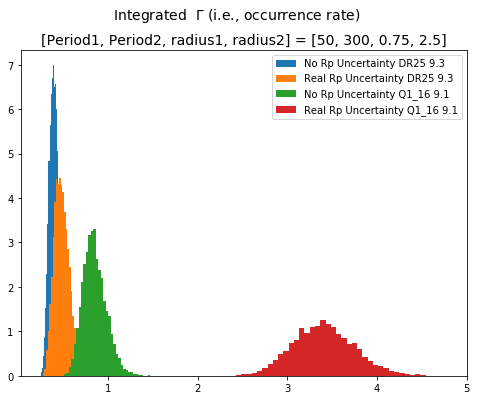

In [13]:
pl.rcParams["figure.figsize"] = (8,6)
pl.hist(np.exp(lnf0_no_DR25), 40, normed='true',label='No Rp Uncertainty DR25 9.3')
pl.hist(np.exp(lnf0_real_DR25), 40, normed='true',label='Real Rp Uncertainty DR25 9.3')
pl.hist(np.exp(lnf0_no_Q1_16), 40, normed='true',label='No Rp Uncertainty Q1_16 9.1')
pl.hist(np.exp(lnf0_real_Q1_16), 40, normed='true',label='Real Rp Uncertainty Q1_16 9.1')
pl.suptitle(r"Integrated  $\Gamma$ (i.e., occurrence rate)", fontsize=14)    
pl.title("[Period1, Period2, radius1, radius2] = {0}".format([x1o,x2o,radius1o,radius2o]), fontsize=14);    
pl.legend()

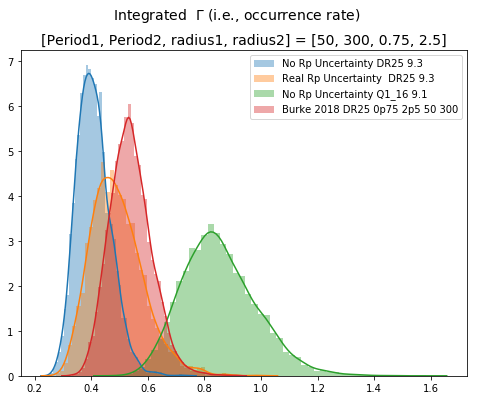

In [16]:
fig = pl.figure()
pl.rcParams["figure.figsize"] = (8,6)
sns.distplot(np.exp(lnf0_no_DR25), label='No Rp Uncertainty DR25 9.3')
sns.distplot(np.exp(lnf0_real_DR25),label='Real Rp Uncertainty  DR25 9.3')
sns.distplot(np.exp(lnf0_no_Q1_16),label='No Rp Uncertainty Q1_16 9.1')
#sns.distplot(np.exp(lnf0_real_Q1_16),label='Real Rp Uncertainty Q1_16 9.1')
sns.distplot(Burke_2018_DR25_0p75_2p5_50_300,label='Burke 2018 DR25 0p75 2p5 50 300')
pl.suptitle(r"Integrated  $\Gamma$ (i.e., occurrence rate)", fontsize=14)    
pl.title("[Period1, Period2, radius1, radius2] = {0}".format([x1o,x2o,radius1o,radius2o]), fontsize=14);    
pl.legend()
fig.savefig('Occ_Rate_with_Radius_Uncertainty_DR25_50_300_0p75_2p5_w_Burke_2018.png')


In [75]:
def summary_stats(x):
    extents = [x.min(), x.max()];
    fig = pl.figure();
    n, b, p = pl.hist(x, bins=50, range=extents, histtype="step", color="red", linewidth=2.0);
    values = credible_interval.from_histogram(n, b,[0.6827, 0.9545]);
    peak_location = b[np.argmax(n)];
    nearest_index1 = np.argmin(np.abs(b-values[0][0])); #from left
    nearest_index2 = np.argmin(np.abs(b-values[0][1]));  #from right
    nearest_index3 = np.argmin(np.abs(b-peak_location))
    pl.plot([(values[0][0]+((b[1]-b[0])/2.)),(values[0][0]+((b[1]-b[0])/2.))],[0,n[nearest_index1]],color='r',linestyle='--');
    pl.plot([(values[0][1]+((b[1]-b[0])/2.)),(values[0][1]+((b[1]-b[0])/2.))],[0,n[nearest_index2]],color='r',linestyle='--');
    pl.plot([(peak_location+((b[1]-b[0])/2.)),(peak_location+((b[1]-b[0])/2.))],[0,n[nearest_index3]],color='r',linestyle='-');

    print('MODE:' + str(peak_location)+ ' '+ '68% Credible Interval:' + ' '  + str(values[0][0]) + ' '+ str(values[0][1]) )


Burke 2018 DR25 0p75 2p5 50 300:
MODE:0.5291001534461975 68% Credible Interval: 0.4665297051789925 0.6113004540599708
Real Rp Uncertainty  DR25 9.3:
MODE:0.43565644802377734 68% Credible Interval: 0.40129472865164784 0.5809846174821078
No Rp Uncertainty DR25 9.3:
MODE:0.38018397853115227 68% Credible Interval: 0.3496606227370316 0.46847614784120606
No Rp Uncertainty Q1_16 9.1:
MODE:0.8115869109964117 68% Credible Interval: 0.724177747881798 0.9850303736645865


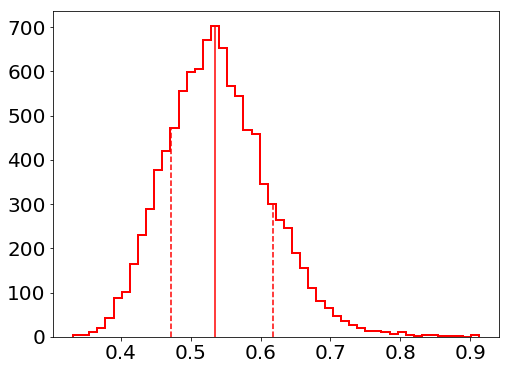

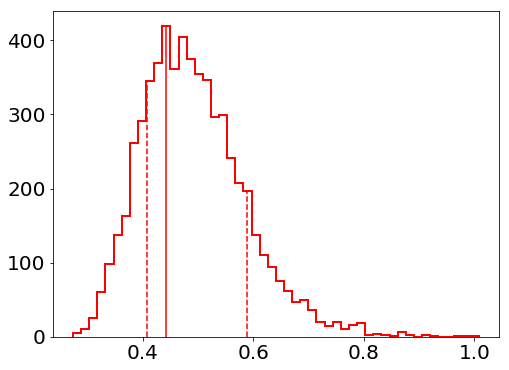

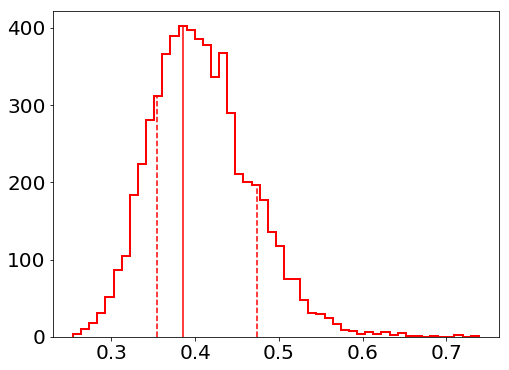

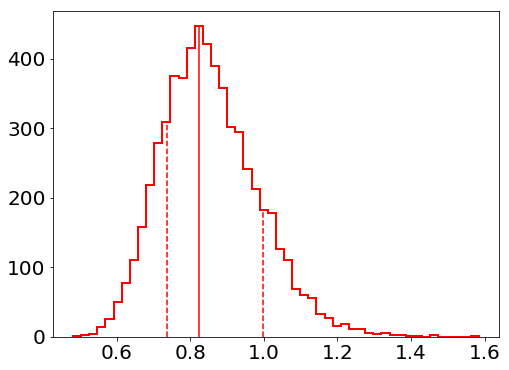

In [79]:
print('Burke 2018 DR25 0p75 2p5 50 300:')
summary_stats(Burke_2018_DR25_0p75_2p5_50_300)
print('Real Rp Uncertainty  DR25 9.3:')
summary_stats(np.exp(lnf0_real_DR25))
print('No Rp Uncertainty DR25 9.3:')
summary_stats(np.exp(lnf0_no_DR25))
print('No Rp Uncertainty Q1_16 9.1:')
summary_stats(np.exp(lnf0_no_Q1_16))